In [1]:
import spacy
import pandas as pd
import nl_core_news_lg
from gensim.corpora.dictionary import Dictionary
from gensim.models import LdaMulticore
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()# Visualise inside a notebook

In [2]:
df = pd.read_csv('nl_gdpr.csv')

In [3]:
df.head(5)

,_id,url,date,text,title
0,5ec806708e00d85b900a3fd7,https://www.nieuwsblad.be/cnt/dmf20200518_0496...,2020-05-18T19:23:33.000Z,Proximus krijgt van de Gegevensbeschermingsaut...,Proximus krijgt recordboete van 50.000 euro vo...
1,5ec80674404b0dba70c1d88e,https://www.tijd.be/r/t/1/id/10227234,2020-05-14T17:06:56.000Z,Pexip onderscheidt zich van Zoom (foto) met ee...,Noorse bruggenbouwer in videobellen knalt beur...
2,5ec806757db77e056c19b83c,https://www.standaard.be/cnt/dmf20200518_04964571,2020-05-18T20:14:00.000Z,Proximus krijgt van de Gegevensbeschermingsaut...,Proximus krijgt recordboete van 50.000 euro vo...
3,5ec80677ac7298b94a3cf469,https://www.tijd.be/r/t/1/id/10227928,2020-05-18T19:35:19.000Z,De Belgische privacywaakhond heeft Proximus de...,Proximus moet privacyboete van 50.000 euro oph...
4,5ec8e7cc51562f74bacea418,https://www.hln.be/geld/datingsite-twoo-krijgt...,2020-05-22T15:13:15.556Z,Datingsite Twoo krijgt boete van 50.000 euro n...,Datingsite Twoo krijgt boete van 50.000 euro n...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1359 entries, 0 to 1358
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   _id     1359 non-null   object
 1   url     1359 non-null   object
 2   date    1359 non-null   object
 3   text    1359 non-null   object
 4   title   1359 non-null   object
dtypes: object(5)
memory usage: 53.2+ KB


In [5]:
df_drop = df.drop(columns = ['_id','url', 'date', 'title'])

In [6]:
df_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1359 entries, 0 to 1358
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    1359 non-null   object
dtypes: object(1)
memory usage: 10.7+ KB


In [7]:
df_drop['text'] = df_drop['text'].astype(str)

In [8]:
# SpaCy model:
nlp = nl_core_news_lg.load()
# Tags I want to remove from the text
removal= ['ADV','PRON','CCONJ','PUNCT','PART','DET','ADP','SPACE', 'NUM', 'SYM']

tokens = []
for summary in nlp.pipe(df_drop['text']):
   proj_tok = [token.lemma_.lower() for token in summary if token.pos_ not in removal and not token.is_stop and token.is_alpha]
   tokens.append(proj_tok)

In [9]:
df_drop['tokens'] = tokens
df_drop['tokens']

0       [proximus, krijgen, gegevensbeschermingsautori...
1       [pexip, onderscheiden, zoom, foto, groot, focu...
2       [proximus, krijgen, gegevensbeschermingsautori...
3       [belgisch, privacywaakhond, proximus, hoog, bo...
4       [datingsite, twoo, krijgen, boete, euro, schen...
                              ...                        
1354    [vrijdagmiddag, uitoefenen, beerschot, laat, k...
1355    [roep, klinken, hard, heel, willen, théo, leon...
1356    [roep, klinken, hard, heel, willen, théo, leon...
1357    [oetoehganal, jeugdproduct, feyenoord, komen, ...
1358    [meta, moederbedrijf, facebook, instagram, gaa...
Name: tokens, Length: 1359, dtype: object

Create dictionary and corpus

In [10]:
# I will apply the Dictionary Object from Gensim, which maps each word to their unique ID:
dictionary = Dictionary(df_drop['tokens'])

In [11]:
print(dictionary)

Dictionary<20377 unique tokens: ['aankondigen', 'aanpassen', 'basis', 'bedrijf', 'belangenconflict']...>


In [12]:
#some of the IDs assigned to the tokens
print(dictionary.token2id)

{'aankondigen': 0, 'aanpassen': 1, 'basis': 2, 'bedrijf': 3, 'belangenconflict': 4, 'bericht': 5, 'beroep': 6, 'beslissen': 7, 'beslissing': 8, 'besluiten': 9, 'blijven': 10, 'boete': 11, 'data': 12, 'directeur': 13, 'dpo': 14, 'echo': 15, 'euro': 16, 'fenaux': 17, 'functie': 18, 'gaan': 19, 'gba': 20, 'gegevensbeschermingsautoriteit': 21, 'geschillenkamer': 22, 'geval': 23, 'gids': 24, 'goed': 25, 'handelen': 26, 'haroun': 27, 'hielke': 28, 'hijmans': 29, 'implementatie': 30, 'krijgen': 31, 'l': 32, 'lezen': 33, 'maand': 34, 'maandagavond': 35, 'marktenhof': 36, 'motivering': 37, 'neemt': 38, 'niveau': 39, 'overeenstemming': 40, 'overtuigen': 41, 'persoon': 42, 'procedure': 43, 'proximus': 44, 'raadgever': 45, 'reageren': 46, 'recordboete': 47, 'respecteren': 48, 'vastleggen': 49, 'verantwoordelijk': 50, 'verondersteld': 51, 'voldoen': 52, 'woordvoerder': 53, 'zeggen': 54, 'ïmplementeren': 55, 'adviseren': 56, 'afsluiten': 57, 'amerikaans': 58, 'app': 59, 'apparatuur': 60, 'audiovisue

In [13]:
#filter out low-frequency and high-frequency tokens, also limit the vocabulary to a max of 1000 words
dictionary.filter_extremes(no_below=5, no_above=0.5, keep_n=1000)

In [14]:
#construct the corpus using the dictionary from above and the doc2bow function.
#The function doc2bow() simply counts the number of occurrences of each distinct word,
#converts the word to its integer word id and returns the result as a sparse vector
corpus = [dictionary.doc2bow(doc) for doc in df_drop['tokens']]

Model building

In [15]:
#train the unsupervised machine learning model on the data. 
lda_model = LdaMulticore(corpus=corpus, id2word=dictionary, iterations=50, num_topics=10, workers = 4, passes=10)

Calculating the coherence score using C_umass

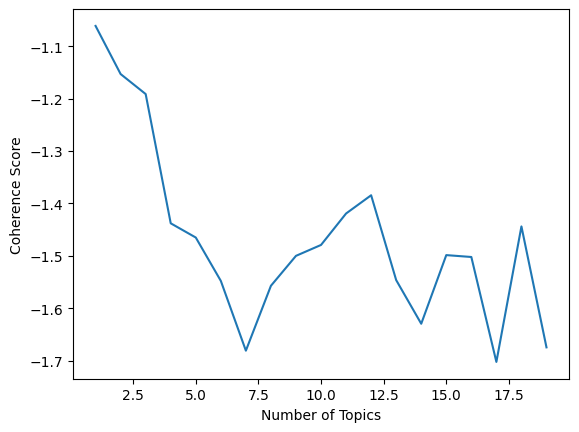

In [16]:
topics = []
score = []
for i in range(1,20,1):
   lda_model = LdaMulticore(corpus=corpus, id2word=dictionary, iterations=10, num_topics=i, workers = 4, passes=10, random_state=100)
   cm = CoherenceModel(model=lda_model, corpus=corpus, dictionary=dictionary, coherence='u_mass')
   topics.append(i)
   score.append(cm.get_coherence())
_=plt.plot(topics, score)
_=plt.xlabel('Number of Topics')
_=plt.ylabel('Coherence Score')
plt.show()

Calculating the coherence score using C_v

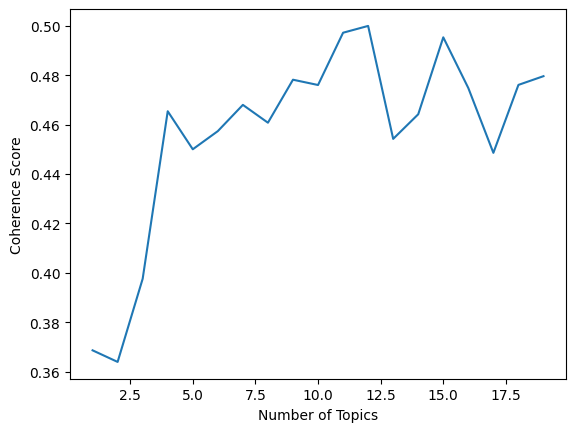

In [17]:
topics = []
score = []
for i in range(1,20,1):
   lda_model = LdaMulticore(corpus=corpus, id2word=dictionary, iterations=10, num_topics=i, workers = 4, passes=10, random_state=100)
   cm = CoherenceModel(model=lda_model, texts = df_drop['tokens'], corpus=corpus, dictionary=dictionary, coherence='c_v')
   topics.append(i)
   score.append(cm.get_coherence())
_=plt.plot(topics, score)
_=plt.xlabel('Number of Topics')
_=plt.ylabel('Coherence Score')
plt.show()

When looking at the coherence using the C_umass or C_v algorithm, the best is usually the max. Looking at the graphs I choose to go with 6 topics.

Optimal model

In [18]:
lda_model = LdaMulticore(corpus=corpus, id2word=dictionary, iterations=100, num_topics=11, workers = 4, passes=100)

Print and visualize topics

In [19]:
lda_model.print_topics(-1)

[(0,
  '0.050*"seizoen" + 0.027*"contract" + 0.019*"kv" + 0.018*"jaar" + 0.015*"club" + 0.014*"vorig" + 0.014*"nieuw" + 0.014*"mechelen" + 0.011*"beerschot" + 0.010*"spelen"'),
 (1,
  '0.036*"club" + 0.023*"goed" + 0.019*"spelen" + 0.018*"seizoen" + 0.017*"speler" + 0.013*"heel" + 0.013*"gaan" + 0.012*"zien" + 0.012*"ploeg" + 0.011*"maken"'),
 (2,
  '0.051*"club" + 0.044*"ketelaere" + 0.040*"brugge" + 0.033*"miljoen" + 0.028*"milan" + 0.021*"charles" + 0.019*"contract" + 0.017*"ac" + 0.016*"la" + 0.014*"anderlecht"'),
 (3,
  '0.037*"medium" + 0.036*"schrijven" + 0.035*"staan" + 0.034*"social" + 0.032*"cookie" + 0.031*"toestemming" + 0.030*"voorkeur" + 0.030*"content" + 0.030*"netwerk" + 0.030*"kliken"'),
 (4,
  '0.014*"zeggen" + 0.014*"gaan" + 0.014*"europees" + 0.012*"maken" + 0.012*"krijgen" + 0.012*"mens" + 0.011*"bedrijf" + 0.009*"nieuw" + 0.009*"gegeven" + 0.009*"privacy"'),
 (5,
  '0.021*"gent" + 0.018*"minuut" + 0.017*"bal" + 0.016*"aa" + 0.015*"helft" + 0.014*"wedstrijd" + 0.01

Where does a text belong to

In [20]:
df['text'][0]

'Proximus krijgt van de Gegevensbeschermingsautoriteit (GBA) een recordboete van 50.000 euro voor een belangenconflict bij zijn Data Protection Officer (DPO), zo bericht L’Echo maandagavond. De DPO is de persoon die binnen het bedrijf verantwoordelijk is voor de goede implementatie van de GDPR-richtlijn.\\n\\n“De DPO wordt verondersteld een gids te zijn in deze procedures. Je kan niet de raadgever zijn én degene die de beslissing neemt zoals bij Proximus het geval was”, zegt Hielke Hijmans, de directeur van de geschillenkamer van de GBA.\\n\\nProximus heeft een maand om in beroep te gaan bij het Marktenhof, maar heeft aangekondigd de beslissing te zullen respecteren. “Op basis van het lezen van de motivering blijven we ervan overtuigd dat wat we hebben geïmplementeerd op het niveau van onze DPO voldeed aan de GDPR-vereisten. De geschillenkamer van de GBA heeft er anders over beslist en besloot een boete op te leggen aan Proximus. We zullen handelen in overeenstemming met de beslissing 

In [21]:
lda_model[corpus][0]

[(4, 0.9715875)]

In [ ]:
#According to our LDA model, the above text belongs to Topic 0 and 4.
#The article is 80% belonging to topic 4 (index 3) and 16% belonging to topic 0 (index 1).

Visualization

In [22]:
lda_display = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(lda_display)

In [ ]:
#path = os.path.join('.results')

In [ ]:
#with open(path, 'wb') as f:
    #pickle.dump(LDAvis,f)

#with open(path, 'rb') as f:
    #LDAvis = pickle.load(f)

#pyLDAvis.save_html(LDAvis, './results' + '_spacy' + '.html')

In [ ]:
# Load the SpaCy model
nlp = spacy.load('nl_core_news_lg')

# Tags I want to remove from the text
removal = ['ADV', 'PRON', 'CCONJ', 'PUNCT', 'PART', 'DET', 'ADP', 'SPACE', 'NUM', 'SYM', 'AUX', 'SCONJ', 'INTJ']

# Words I want to remove from the tokens
remove_words = ['al', 'als', 'een', 'om', 'het', 'de', 'dat', 'nog', 'ook']

tokens = []

for summary in nlp.pipe(df_drop['text']):
    proj_tok = [token.lemma_.lower() for token in summary if token.pos_ not in removal and not token.is_stop and token.is_alpha
                and token.text.lower() not in remove_words]
    tokens.append(proj_tok)